In [2]:
##*#-*- encoding: utf-8 -*-
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import sdr
%matplotlib inline

In [4]:
##*
def _remove_abnormal(all_data):
    ## Pre-processing - 1. Input Missing values
    ## There are many options in order to deal with a missing value such as:
    ## - A constant value that has meaning within the domain, such as 0, distinct from all other values.
    ## - A value from another randomly selected record.
    ## - A mean, median or mode value for the column.
    ## - A value estimated by another predictive model.
    ## We are going to replace a missing value to 0 for numeric columns and 'empty' for string columns, respectively.

    ## Filling for missing values
    categorical_columns_list = []
    for each in all_data.columns:
        if all_data[each].dtypes != 'int64':
            if all_data[each].dtypes != 'float64':
                categorical_columns_list.append(each)
    for item in categorical_columns_list:
        all_data[item].fillna("empty",inplace=True)
    all_data.fillna(0, inplace=True)
    
    return all_data

In [19]:
##*
def _pre_feature(all_data, processingFeature):
    ## Pre-processing - 2. Vectorization for Input
    column_list = ['x'] # all columns list
    features = ['x'] # feature list
    target = 'y'

    ## Listing features and scaling datasets
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler_fit = scaler.fit(all_data[features])
    results = scaler_fit.transform(processingFeature[features])
    return pd.DataFrame(results, columns=features)

In [20]:
def _pre_target(all_data, processingTarget):
    ## Pre-processing - 2. Vectorization for Output
    target = 'y'
    ## Output Column has Numeric data. There is nothing to be vectorized.

    return processingTarget

In [21]:
def _post_target(all_data, predicted): 
    ## Post-processing for Output
    target = 'y'
    ## For the Regression task, We do nothing here

    return predicted

In [16]:
##* Data Loading
try:
    all_data = pd.read_csv("./dataset/feature.csv")
except:
    all_data = pd.read_csv("./dataset/feature.csv", encoding = "ISO-8859-1")
## Discover the head of your data
all_data.head()
all_data
target = 'y'
##* Preprocess the feature and target values in data
all_data = _remove_abnormal(all_data)
xy = all_data.copy()
y = xy.loc[:, [target]]
x = xy.drop(target, axis=1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Prediction accuracy:  0.8127106160956304
   Predicted    Actual
0   3.011440  3.498926
1   1.978644  1.857290


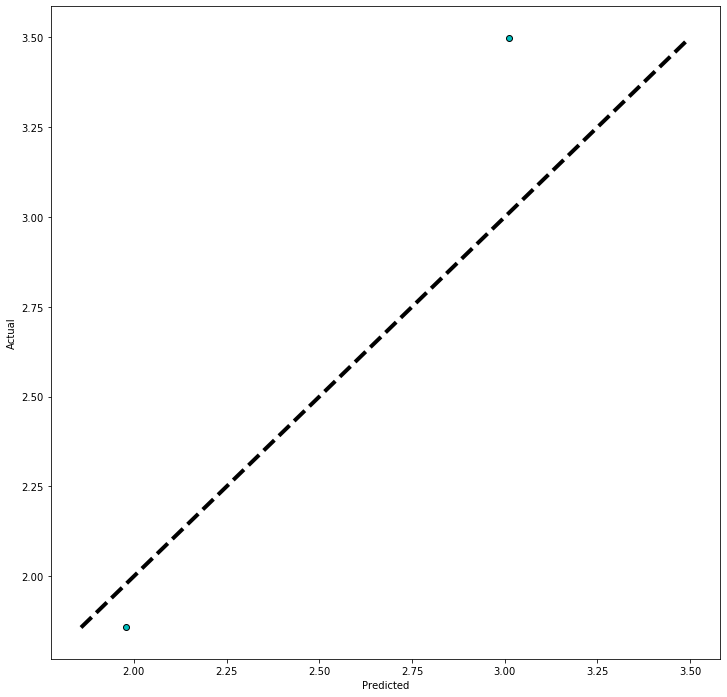

AttributeError: module 'sdr' has no attribute 'AIModel'

In [22]:
processedX = _pre_feature(all_data, x)
features = processedX.columns.tolist()
processedY = _pre_target(all_data, y)
scaled_all_data = pd.concat([processedX, processedY], axis=1)
##* Train and Test Dataset Split
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(scaled_all_data, test_size = 0.2, shuffle = True)
##* Random Forests Regression
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(criterion = "mse", max_depth = None, min_samples_split = 2, n_estimators = 100, min_samples_leaf = 1)
# Quality of a split, The max. depth of the tree, The min. num required to split an internal node, Number of trees, The max. num required to be at a leaf node
clf.fit(train_data[features], train_data[target])

#- [OPTION_NAME = (default value)]
#- n_estimators = 100 // int, optional. The number of trees in the forest.
#- criterion // string, optional. The function to measure the quality of a split.
#- criterion = 'mse' // string, optional. For regression only. 'mse' and 'mae' are supported.
#- criterion = 'gini' // string, optional. For classification only. 'gini' and 'entropy' are supported.
#- max_depth = None // int or None, optional. The maximum depth of the tree. If none, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
#- min_samples_split = 2 // int, optional. The minimum number of samples required to split an internal node: If int, then consider min_samples_split as the minimum number. If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
#- min_samples_leaf = 1 // int, optional. The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression. If int, then consider min_samples_leaf as the minimum number. If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.
#- You can find parameters details at
#- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
#- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

## results
print(clf)
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
##* Predict using the model we made.
predicted = clf.predict(test_data[features])
confidence = clf.score(test_data[features], test_data[target])	# Returns the coefficient of determination R^2 of the prediction.
print("Prediction accuracy: ", confidence)

## Comparing output data of the testing datasets(never learned) with the predicted output data using input data of the testing datasets.
vs = pd.DataFrame(np.c_[predicted, test_data[target]], columns=['Predicted', 'Actual'])
print(vs.head())
##* Plotting testing datasets vs. predicted datasets
vsplot, ax = plt.subplots(1, 1, figsize=(12,12))
ax.scatter(x = predicted, y = test_data[target], color='c', edgecolors=(0, 0, 0))
ax.plot([test_data[target].min(), test_data[target].max()], [test_data[target].min(), test_data[target].max()], 'k--', lw=4)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()
######################################################################
## You have to save the AI Model for submitting your model
## You have to prepare a parameter: model
## (trained model that you want to register)
## After you call this method, a 'model.h5' or 'model.pkl' file will be created. Do not change the file name!
######################################################################
aiModel = sdr.AIModel()
aiModel.saveAIModel(clf)

# MNIST Example

In [ ]:
##*#-*- encoding: utf-8 -*-
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import sdr
%matplotlib inline

In [ ]:
def _remove_abnormal(all_data):
    ## Pre-processing - 1. Input Missing values
    ## There are many options in order to deal with a missing value such as:
    ## - A constant value that has meaning within the domain, such as 0, distinct from all other values.
    ## - A value from another randomly selected record.
    ## - A mean, median or mode value for the column.
    ## - A value estimated by another predictive model.
    ## We are going to replace a missing value to 0 for numeric columns and 'empty' for string columns, respectively.

    ## Filling for missing values
    categorical_columns_list = []
    for each in all_data.columns:
        if all_data[each].dtypes != 'int64':
            if all_data[each].dtypes != 'float64':
                categorical_columns_list.append(each)
    for item in categorical_columns_list:
        all_data[item].fillna("empty",inplace=True)
    all_data.fillna(0, inplace=True)
    
    return all_data

In [ ]:
##*
def _pre_feature(all_data, processingFeature):
    ## Pre-processing - 2. Vectorization for Input
    column_list = ['x'] # all columns list
    features = ['x'] # feature list
    target = 'y'

    ## Listing features and scaling datasets
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    scaler_fit = scaler.fit(all_data[features])
    results = scaler_fit.transform(processingFeature[features])
    return pd.DataFrame(results, columns=features)

In [ ]:
def _pre_target(all_data, processingTarget):
    ## Pre-processing - 2. Vectorization for Output
    target = 'y'
    ## Output Column has Numeric data. There is nothing to be vectorized.

    return processingTarget

In [ ]:
def _post_target(all_data, predicted): 
    ## Post-processing for Output
    target = 'y'
    ## For the Regression task, We do nothing here

    return predicted

In [29]:
import csv
from PIL import Image
import torch
# Training Set
temp_images = []
temp_labels = []        

target_path = './dataset/mnist-dataset'
with open(target_path + '/mnist_training_100.csv', 'r') as csv_file:
    for idx, data in enumerate(csv.reader(csv_file)):
        if idx>0:
            temp_images.append(data[0])
            temp_labels.append(data[1])

data_size = len(temp_images)
img = Image.open(target_path + '/' + temp_images[0])
img_size = np.array(img).shape
trains = np.zeros((data_size, img_size[0], img_size[1]))
labels = np.zeros((data_size))

for idx,image in enumerate(temp_images):
    img = Image.open(target_path + '/' + image)
    arr = np.array(img)
    trains[idx] = arr
    labels[idx] = temp_labels[idx]

x_train, y_train = map(
    torch.tensor, (trains, labels)
)

# Normalization
x_train = torch.div(x_train,255.)
x_train = torch.add(x_train,-0.1307)
x_train = torch.div(x_train,0.3081)
# Set Number of channel to 1
x_train = x_train.unsqueeze(1)

x_train = x_train.float()
y_train = y_train.long()

In [31]:
x_train.shape

torch.Size([100, 1, 28, 28])

In [32]:
y_train.shape

torch.Size([100])

In [36]:
import pandas as pd

In [41]:
x_train.numpy()

array([[[[-0.42421293, -0.42421293, -0.42421293, ..., -0.42421293,
          -0.42421293, -0.42421293],
         [-0.42421293, -0.42421293, -0.42421293, ..., -0.42421293,
          -0.42421293, -0.42421293],
         [-0.42421293, -0.42421293, -0.42421293, ..., -0.42421293,
          -0.42421293, -0.42421293],
         ...,
         [-0.42421293, -0.42421293, -0.42421293, ..., -0.42421293,
          -0.42421293, -0.42421293],
         [-0.42421293, -0.42421293, -0.42421293, ..., -0.42421293,
          -0.42421293, -0.42421293],
         [-0.42421293, -0.42421293, -0.42421293, ..., -0.42421293,
          -0.42421293, -0.42421293]]],


       [[[-0.42421293, -0.42421293, -0.42421293, ..., -0.42421293,
          -0.42421293, -0.42421293],
         [-0.42421293, -0.42421293, -0.42421293, ..., -0.42421293,
          -0.42421293, -0.42421293],
         [-0.42421293, -0.42421293, -0.42421293, ..., -0.42421293,
          -0.42421293, -0.42421293],
         ...,
         [-0.42421293, -0.424212